In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import subprocess
import time
import pandas as pd
import pickle
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.metrics import accuracy_score, silhouette_score, adjusted_rand_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, KMeans
from sklearn.model_selection import KFold, LeaveOneOut, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn import linear_model
from sklearn.manifold import TSNE
import scipy.stats as stats
import scipy.io as sio
from scipy import interpolate
from sklearn.metrics import roc_auc_score as auROC
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import (ModelDesc, EvalEnvironment, Term, EvalFactor, LookupFactor, dmatrices, INTERCEPT)
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.patches as mpatches
import sys
import re
import random
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

np.set_printoptions(suppress=True)

###DECODING STARTS HERE
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as stats
import scipy.io as sio
import os
import subprocess
import pickle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, SVR
from sklearn.decomposition import PCA
from statsmodels.distributions.empirical_distribution import ECDF


In [2]:
frameaveraging = 4
timebetweenframes = 33.3333
framerate = 30
framerate = timebetweenframes/frameaveraging ###RAW FRAMERATE
averagedframerate = timebetweenframes/frameaveraging ###AVERAGED FRAMERATE

def analyze_single_session(indir, window_size, pre_window_size):
        
    tempfiles = next(os.walk(indir))[2]
    npyfiles = [f for f in tempfiles if os.path.splitext(f)[1]=='.npy' and 'extractedsignals_raw' in f]
    matfiles = [f for f in tempfiles if os.path.splitext(f)[1]=='.mat']
    if len(npyfiles) > 1:
        npyfile = [f for f in tempfiles if os.path.splitext(f)[1]=='.npy' and 'extractedsignals_raw' in f and not 'part2' in f and not 'part3' in f and not 'part4' in f]
        npyfile = npyfile [0]
        matfile = [f for f in tempfiles if os.path.splitext(f)[1]=='.mat' and not 'results' in f and not 'part2' in f and not 'part3' in f and not 'part4' in f]
        matfile = matfile [0]
    else:
        npyfile = npyfiles[0]
        matfile = matfiles[0]
    
    signals = np.squeeze(np.load(os.path.join(indir, npyfile)))
    numrois = signals.shape[0] 
   
    behaviordata = sio.loadmat(os.path.join(indir, matfile))
    eventlog = np.squeeze(behaviordata['eventlog'])
    licks = np.squeeze(behaviordata['licks'])
    lastframe_timestamp_part1 = np.max(eventlog)
    
    if len(npyfiles) > 1:
        npyfiles2 = [f for f in tempfiles if os.path.splitext(f)[1]=='.npy' and 'extractedsignals_raw'and 'part2' in f]
        matfiles2 = [f for f in tempfiles if os.path.splitext(f)[1]=='.mat' and 'part2' in f and not 'results' in f]
        
        npyfile2 = npyfiles2[0]
        matfile2 = matfiles2[0]
        
        signals2 = np.squeeze(np.load(os.path.join(indir, npyfile2))) 
        signals = np.hstack((signals, signals2))

        
        behaviordata2 = sio.loadmat(os.path.join(indir, matfile2))
        
        eventlog2 = np.squeeze(behaviordata2['eventlog'])
        eventlog2[:,1] = eventlog2[:,1]+lastframe_timestamp_part1  #adding the last frame to the second column of data in eventlog
        eventlog = np.concatenate((eventlog,eventlog2))
        lastframe_timestamp_part2 = np.max(eventlog)
        
        
        licks2 = np.squeeze(behaviordata2['licks'])
        licks2 = licks2+lastframe_timestamp_part1
        licks = np.concatenate ([licks, licks2])
        
    if len(npyfiles) > 2:
        npyfiles3 = [f for f in tempfiles if os.path.splitext(f)[1]=='.npy' and 'extractedsignals_raw'and 'part3' in f]
        matfiles3 = [f for f in tempfiles if os.path.splitext(f)[1]=='.mat' and 'part3' in f and not 'results' in f]
        
        npyfile3 = npyfiles3[0]
        matfile3 = matfiles3[0]
        
        signals3 = np.squeeze(np.load(os.path.join(indir, npyfile3))) 
        signals = np.hstack((signals, signals3))
        
        behaviordata3 = sio.loadmat(os.path.join(indir, matfile3))
        
        eventlog3 = np.squeeze(behaviordata3['eventlog'])
        eventlog3[:,1] = eventlog3[:,1]+lastframe_timestamp_part2  #adding the last frame to the second column of data in eventlog
        eventlog = np.concatenate((eventlog,eventlog3))
        lastframe_timestamp_part3 = np.max(eventlog)
        
        
        licks3 = np.squeeze(behaviordata3['licks'])
        licks3 = licks3+lastframe_timestamp_part2
        licks = np.concatenate ([licks, licks3])
    
    if len(npyfiles) > 3:
        npyfiles4 = [f for f in tempfiles if os.path.splitext(f)[1]=='.npy' and 'extractedsignals_raw' and 'part4' in f]
        matfiles4 = [f for f in tempfiles if os.path.splitext(f)[1]=='.mat' and 'part4' in f and not 'results' in f]
        
        npyfile4 = npyfiles4[0]
        matfile4 = matfiles4[0]
        
        signals4 = np.squeeze(np.load(os.path.join(indir, npyfile4))) 
        signals = np.hstack((signals, signals4))
        
        behaviordata4 = sio.loadmat(os.path.join(indir, matfile4))
        
        eventlog4 = np.squeeze(behaviordata4['eventlog'])
        eventlog4[:,1] = eventlog4[:,1]+lastframe_timestamp_part3  #adding the last frame to the second column of data in eventlog
        eventlog = np.concatenate((eventlog,eventlog4))
        lastframe_timestamp_part4 = np.max(eventlog)
        
        
        licks4 = np.squeeze(behaviordata4['licks'])
        licks4 = licks4+lastframe_timestamp_part3
        licks = np.concatenate ([licks, licks4])
    
    
    ###THIS SECTION DEFINES CERTAIN INPUTS IN EVENTLOG AS BEHAVIORAL STIMULI (LEVER PRESS, CUE, ETC)
    activelever = eventlog[eventlog[:,0]==22,1]
    activelevertimeout = eventlog[eventlog[:,0]==222,1]
    inactivelever = eventlog[eventlog[:,0]==21,1]
    inactivelevertimeout = eventlog[eventlog[:,0]==212,1]
    cues = eventlog[eventlog[:,0]==7,1]
    infusions = eventlog[eventlog[:,0]==4,1]
    
#     print(activelever.shape, '=activelever')
#     print(activelevertimeout.shape,'=activelevertimeout')
    
    signals /= np.mean(signals, axis=1)[:, None]
    signalsT = signals.T
    
    ###IF YOUR CODE LACKS FRAME INPUTS, WE CAN ATTEMPT TO PREDICT FRAME TIMING BY USING PREVIOUS FRAME TIMESTAMPS
    if animal == 'CTL1' or animal == 'ER-L1' or animal == 'ER-L2' or animal == 'IG-19' or animal == 'IG-28' or animal == 'PGa-T1' or animal == 'XYZ':
        frame_timestamps = assumed_frame_timestamps ###Fixes issue for finding behavior IF YOU DON"T HAVE FRAME INFO
    else:
        frame_timestamps = fix_any_dropped_frames(eventlog[eventlog[:,0]==9,1])
        
    frame_timestamps = frame_timestamps[::frameaveraging] ###incorporates averaging into timestamp array
    
    ###DISCARDS BEHAVIORAL EVENTS THAT WERE NOT FULLY MONITORED WITH IMAGING
    if signals.shape[1] > frame_timestamps.shape[0]:
        signals = signals[:,:frame_timestamps.shape[0]-1] ###cuts signals so it's not longer than the frame timestamps
    final_frame_timestamp = frame_timestamps[signals.shape[1]] #This is the timestamp of the final frame in milliseconds
    activelever = activelever[activelever<(final_frame_timestamp-(window_size/framerate*1000))]
    activelevertimeout = activelevertimeout[activelevertimeout<(final_frame_timestamp-(window_size/framerate*1000))]
    inactivelever = inactivelever[inactivelever<(final_frame_timestamp-(window_size/framerate*1000))]
    inactivelevertimeout = inactivelevertimeout[inactivelevertimeout<(final_frame_timestamp-(window_size/framerate*1000))]
    
    seconds_monitored = int(signals.shape[1]/averagedframerate) ###seconds monitored by 2p imaging
    seconds_behavior = int(max(activelever/1000)) ###final seconds to be monitored for behavior

    
    if seconds_monitored < seconds_behavior: #calculates last fully-monitored active lever press with 2p recording
        included_trials = []
        discarded_trials=[]
        for i in range(len(activelever)):
            if activelever[i]/1000<seconds_monitored:
                included_trials=np.append(included_trials, activelever[i])
            else:
                discarded_trials=np.append(discarded_trials,activelever[i])
        activelever=included_trials
#         print ('The behavioral file is longer than the imaging file. We discarded n = ', len(discarded_trials), ' active lever presses')
#         print ('and included n = ', len(included_trials), ' active lever presses')   
        
#     signals /= np.nanmean(signals, axis=1)[:, None]
#     signalsT = signals.T    
    
    ###COMBINES ALL PRESSES
    activeleverall = np.hstack((activelever, activelevertimeout))
#     activeleverall = activelever ###UNCOMMENT TO LOOK AT CUE-REINFORCED TRIALS ONLY
#     activeleverall = activelevertimeout ###UNCOMMENT TO LOOK AT CUE-NONREINFORCED TRIALS ONLY
    inactiveleverall = np.hstack((inactivelever, inactivelevertimeout))

    if activelever.shape[0] < 5:
        activeleverall = np.array([])
        print('<5 active presses, data excluded')
#     if inactiveleverall.shape[0] < 10:
#         activeleverall = np.array([])
#         print('<10 presses, data excluded')
    
    def calculate_aligneddata_forevent(data, frame_after_event):
        framenumberfor_eventofinterest = np.squeeze(framenumberforevent(frame_after_event, frame_timestamps))
        numtrials = framenumberfor_eventofinterest.shape[0]
        
        if data.size==signals.size:
            align = np.NAN*np.zeros([numtrials,window_size,numrois])
            align_to_plot = np.NAN*np.zeros([numtrials,window_size,numrois])###CHANGED ON AUGUST 20 2021
        else:
            align = np.NAN*np.zeros([numtrials,window_size])
            align_to_plot = np.NAN*np.zeros([numtrials,window_size])

        #align_to_plot is made in such a way that for every trial, only frames that have not been plotted
        # in the previous trial are plotted. So if the previous trial's post_window_size-th frame after
        # origin is after this trial's pre_window_size-th frame before origin, then the overlapping frames
        # are stored as nan.
            
        temp = data
        prevendindex = 0
        for i in range(numtrials):  ###CHANGED THIS SECTION ON AUGUST 20 2021
            tempindex = framenumberfor_eventofinterest[i]
            if np.isfinite(tempindex):
                tempindex = int(tempindex)
                tempstartindex = np.amin([pre_window_size, tempindex]).astype(int)
                startindex = np.amin([tempstartindex, tempindex-prevendindex]).astype(int)
                tempendindex = np.amin([len(frame_timestamps)-tempindex, post_window_size])
                if i<(numtrials-1) and np.isfinite(framenumberfor_eventofinterest[i+1]):
                    endindex = np.amin([framenumberfor_eventofinterest[i+1]-tempindex, tempendindex]).astype(int)
                else:
                    endindex = tempendindex.astype(int)  
                prevendindex = tempindex+endindex
                if temp.shape[0]!=temp.size:
                    align_to_plot[i,pre_window_size-startindex:pre_window_size+endindex,:] = temp[tempindex-startindex:tempindex+endindex,:]
                    align[i,pre_window_size-tempstartindex:pre_window_size+endindex,:] = temp[tempindex-tempstartindex:tempindex+endindex,:]
                else: 
                    align_to_plot[i,pre_window_size-startindex:pre_window_size+endindex] = temp[tempindex-startindex:tempindex+endindex]
                    align[i,pre_window_size-tempstartindex:pre_window_size+endindex] = temp[tempindex-tempstartindex:tempindex+endindex]
            else:
                if temp.shape[0]!=temp.size:
                    align_to_plot[i,:,:] = np.nan*np.ones((window_size, numrois))
                    align[i,:,:] = np.nan*np.ones((window_size, numrois))
                else:
                    align_to_plot[i,:] = np.nan*np.ones((window_size))
                    align[i,:] = np.nan*np.ones((window_size))

        if temp.shape[0]!=temp.size:         
            align_to_plot = align_to_plot[np.where(np.isfinite(align_to_plot[:,0,0]))[0],:,:]     
        else:
            align_to_plot = align_to_plot[np.where(np.isfinite(align_to_plot[:,0]))[0],:]
            
        return align, align_to_plot, framenumberfor_eventofinterest

    align_activelever, align_to_plot_activelever, framenumberfor_frameafter_activelever = \
        calculate_aligneddata_forevent(signalsT, activelever)  ###CHANGE LAST VARIABLE TO CHANGE EXTRACTED INFO
    align_activelevertimeout, align_to_plot_activelevertimout, framenumberfor_frameafter_activelevertimeout = \
        calculate_aligneddata_forevent(signalsT, activelevertimeout)  
    
    populationdata_activelever = np.nanmean(align_activelever, axis=0).T-1
    populationdata_activelevertimeout = np.nanmean(align_activelevertimeout, axis=0).T-1
    
    for i in range(signals.shape[0]):
        if np.isnan(np.mean(signals[i,:])):
            print(animal, fov, 'IMAGE J ROI.ZIP CELL NUMBER %s HAS NaNs AND SHOULD BE CHANGED'%(i+1))

# print shape(populationdata_activelever) if populationdata_activelever = \
#         nan np.isnan() method  #To check for NaN values in a Numpy array you can use the np. isnan() method. This outputs a boolean mask of the size that of the original array. The output array has true for the indices which are NaNs in the original array and false for the rest.
#         import pandas as pd. x = float("nan") print(f"It's pd.isna : { pd.isna(x) }")OutputIt's pd.isna : True.
#         import numpy as np. x = float("nan") print(f"It's np.isnan : { np.isnan(x) }")OutputIt's np.isnan : True.
#         import math. x = float("nan")
    
    
#     align_activelevertimeout, align_to_plot_activelevertimeout, framenumberfor_frameafter_activelevertimeout = calculate_aligneddata_forevent(signalsT,
#                                                                                                                 activelevertimeout)

#     aligned_alltrials, aligned_to_plot_alltrials, framenumberfor_firstlickafteralltrials = calculate_aligneddata_forevent(signalsT, cues)  ###Added to save aligned_to_trial.npy for decoding
#     np.save(os.path.join(indir,'aligned to trial.npy'), aligned_alltrials)  ###TO SAVE 'aligned to trial.npy' FOR DECODING
    
    populationdata_activelever = np.nanmean(align_activelever, axis=0).T-1
    populationdata_activelevertimeout = np.nanmean(align_activelevertimeout, axis=0).T-1
        
#     return populationdata_activelever, populationdata_activelevertimeout, align_activelever, align_activelevertimeout, framerate
    return populationdata_activelever, populationdata_activelevertimeout, align_activelever, align_activelevertimeout, framerate


    ###NOTE:  populationdata_sucrose is CS+ responses for each neuron, averaged across trials (2 dimensional). Used for population heat maps.
    ###NOTE:  align_sucrose is the same, but not averaged across trials (3 dimensional). Use for PieCharts and individual cell responses.

    
###OTHER FUNCTIONS
def fit_regression(x, y):
    lm = sm.OLS(y, sm.add_constant(x)).fit()
    x_range = sm.add_constant(np.array([x.min(), x.max()]))
    x_range_pred = lm.predict(x_range)
    return lm.pvalues[1], lm.params[1], x_range[:,1], x_range_pred, lm.rsquared

def CDFplot(x, ax, color=None, label='', linetype='-'):
    x = np.array(x)
    ix=np.argsort(x)
    ax.plot(x[ix], ECDF(x)(x)[ix], linetype, color=color, label=label)
    return ax

def fit_regression_and_plot(x, y, ax, plot_label='', color='k', markersize=3):
    #linetype is a string like 'bo'
    pvalue, slope, temp, temppred, R2 = fit_regression(x, y)    
    ax.scatter(x, y, color=color, label='%s p=%.3f\nR$^2$=%.3f'% (plot_label, pvalue, R2), s=markersize)
    ax.plot(temp, temppred, color=color)
    return ax, slope, pvalue, R2


def ismembertol(x, y, tol=1E-6):
    # Are elements of x in y within tolerance of tol?
    # x and y must be 1d numpy arrays
    sortx = np.sort(x)
    orderofx = np.argsort(x)
    sorty = np.sort(y)
    current_y_idx = 0
    result = np.nan*np.zeros(x.shape)
    for i, elt in enumerate(sortx):
        temp = sorty[current_y_idx:]
        if np.any(np.abs(temp-elt)<=tol):
            result[orderofx[i]]=1
        else:
            result[orderofx[i]]=0
        temp = np.argwhere(sorty>elt)
        if temp.size>0:
            current_y_idx = temp[0][0]
    return result

def mkdir_p(path):
    #makes a new directory if it doesn't exist
    try:
        os.makedirs(path)
    except OSError as exc: # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise 
            
def framenumberforevent(event, frame_timestamps):
    framenumber = np.nan*np.zeros(event.shape)
    for ie, e in enumerate(event):
        if np.isnan(e):
            framenumber[ie] = np.nan
        else:
            temp = np.nonzero(frame_timestamps<=e)[0]
            if temp.shape[0]>0:
                framenumber[ie] = np.nonzero(frame_timestamps<=e)[0][-1]
            else:
                framenumber[ie] = 0
    return framenumber

def calculate_num_licks_for_each_frame(framenumberforlicks, numframes):
    numlicksperframe = np.nan*np.ones((numframes,))
    for i in range(numframes):
        numlicksperframe[i] = np.sum(framenumberforlicks==i)
    return numlicksperframe

def calculate_auROC(x,y,offset_to_zero=True):
    U, p = stats.mannwhitneyu(x,y)
    labels = np.concatenate((np.ones(x.shape), np.zeros(y.shape)))
    data = np.concatenate((x,y))
    A = auROC(labels, data)
    if offset_to_zero:
        return (2*(A-0.5), p)
    else:
        return (A, p)
    
def Benjamini_Hochberg_correction(vector_of_pvals,
                                  alpha = 0.05):
    # This function implements the BH FDR correction
    
    # Parameters:
    # Vector of p values from the different tests
    # alpha:significance level
    
    # Returns: Corrected p values. All the p values that are above the FDR threshold are set to 1. 
    #          Remaining p values are unchanged.
    
    sortedpvals = np.sort(vector_of_pvals)
    orderofpvals = np.argsort(vector_of_pvals)
    m = sortedpvals[np.isfinite(sortedpvals)].shape[0] #Total number of hypotheses
    for i in range(m):
        if sortedpvals[i] > (i+1)*alpha/m:
            k = i
            break
        elif i == m-1:
            k = m-1
        
    correctedpvals = np.copy(vector_of_pvals)
    correctedpvals[orderofpvals[k:]] = 1
    correctedpvals[np.isnan(vector_of_pvals)] = np.nan
    return correctedpvals

In [5]:
basedir = r'/Users/jboqu/Dropbox/2P Imaging Projects/Beth/LC-PrL DREADDs Self Admin Analysis/Controls'
earlybasedir = r'/Users/jboqu/Dropbox/2P Imaging Projects/Beth/LC-PrL DREADDs Self Admin Analysis/Controls/CueRein'
middlebasedir = r'/Users/jboqu/Dropbox/2P Imaging Projects/Beth/LC-PrL DREADDs Self Admin Analysis/Controls/CueReinCNO'
latebasedir = r'/Users/jboqu/Dropbox/2P Imaging Projects/Beth/LC-PrL DREADDs Self Admin Analysis/Controls/CueReinPersist'


###ACQUSITION ALL MICE OF INTEREST 
early_animals_of_interest = ['LCDD-PGa4','LCDD-PGa5','LCDD-PGa6','PGa-T1','PGa-T2','PGa-T3']  
middle_animals_of_interest = ['LCDD-PGa4','LCDD-PGa5','LCDD-PGa6','PGa-T1','PGa-T2']
late_animals_of_interest = ['LCDD-PGa4','LCDD-PGa5','LCDD-PGa6','PGa-T1','PGa-T2','PGa-T3']

###MICE WITH > 5 ACTIVE AND TIMEOUT PRESSES
early_animals_of_interest = ['LCDD-PGa4','LCDD-PGa5','LCDD-PGa6','PGa-T1','PGa-T2','PGa-T3']  
middle_animals_of_interest = ['LCDD-PGa4','LCDD-PGa5','LCDD-PGa6','PGa-T1','PGa-T2']
late_animals_of_interest = ['LCDD-PGa4','LCDD-PGa6','PGa-T1','PGa-T2','PGa-T3']

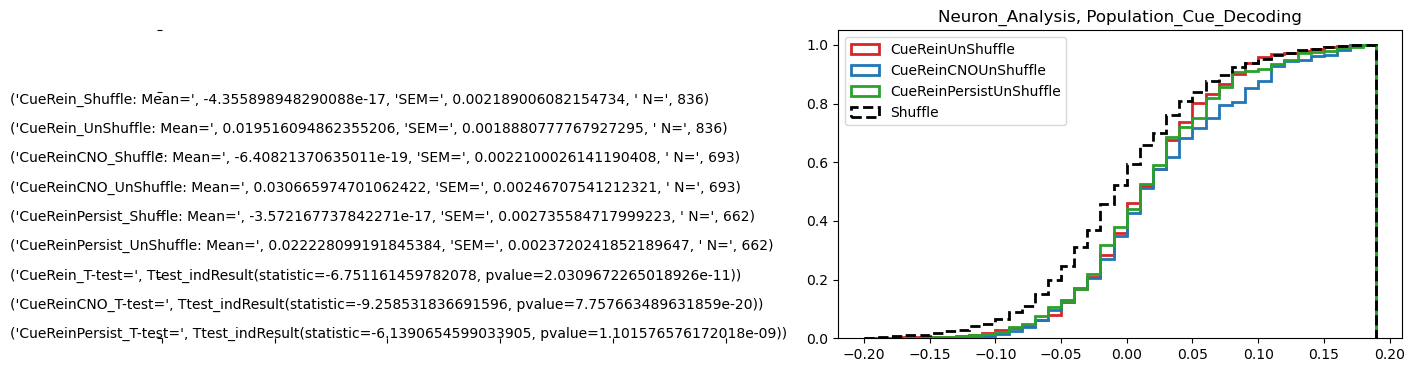

In [4]:
### DECODING CDF PLOTS FOR EARLY AND LATE DATA
analyze_by = 'Neuron' ###Session or Neuron
decodedir = os.path.join(basedir, 'Results', 'Decoding')
# newlabels=np.load(os.path.join(earlybasedir, 'PFC HEROIN SA_clusterlabels_EMD-no-tracking_CUE.npy'))
variables_to_analyze = ['Cue']
groups = ['CueRein','CueReinCNO','CueReinPersist'] 
color = (['tab:red'],['tab:blue'],['tab:green'])
bins = np.arange(-0.2,0.2,0.01)
ls = ['--','solid']

d = {}
###THIS SECTION IS FOR LOADING AND PLOTTING SAVED POPULATION DECODING ARRAYS (BY NEURON OR SESSION)
for v, variable in enumerate (variables_to_analyze):
    d[variable] = {}
    all_shuffle_for_variable=[]
    fig, ax = plt.subplots(1, 2, figsize = (16,4))
    for g, group in enumerate(groups):
        d[variable][group] = {}
        d[variable][group] = np.array(np.load(os.path.join(decodedir, \
            'PFC HEROIN SA_%s_%s_Decoding_Population_%s.npy'%(group,variable,analyze_by)),\
            allow_pickle = True).astype(float))
        temp_unshuffle_nonans, temp_shuffle_nonans = ([],[])
        temp_unshuffle,temp_shuffle = (d[variable][group][0],d[variable][group][1])
        for i in range(len(temp_unshuffle)):
            if np.isfinite(temp_unshuffle[i]):
                temp_unshuffle_nonans = np.append(temp_unshuffle_nonans, temp_unshuffle[i])
        for i in range(len(temp_shuffle)):
            if np.isfinite(temp_shuffle[i]):
                temp_shuffle_nonans = np.append(temp_shuffle_nonans, temp_shuffle[i])
        temp_unshuffle_nonans = temp_unshuffle_nonans-np.mean(temp_shuffle_nonans)
        temp_shuffle_nonans = temp_shuffle_nonans-np.mean(temp_shuffle_nonans)
        plt.hist((temp_unshuffle_nonans),  density=True, cumulative=True,\
            label = ['%sUnShuffle'%(group)], histtype='step',\
            linestyle = ('-'), bins = bins, color = color[g], linewidth=2)
        all_shuffle_for_variable = np.append(all_shuffle_for_variable, temp_shuffle_nonans)
        if g == len(groups)-1:
            plt.hist((all_shuffle_for_variable),  density=True, cumulative=True,\
                label = ['Shuffle','%sUnhuffle'%(group)], histtype='step',\
                linestyle = ('--'), bins = bins, color = 'k', linewidth=2)
        
        plt.text(-0.85, (0.8-g*.2), ('%s_Shuffle: Mean='%(group), np.mean(temp_shuffle_nonans), \
            'SEM=', stats.sem(temp_shuffle_nonans), ' N=',len(temp_shuffle_nonans)))
        plt.text(-0.85, 0.7-g*.2, ('%s_UnShuffle: Mean='%(group), np.mean(temp_unshuffle_nonans), \
            'SEM=', stats.sem(temp_unshuffle_nonans), ' N=',len(temp_unshuffle_nonans)))
        plt.text(-0.85, 0.2-g*.1, ('%s_T-test='%(group), stats.ttest_ind(temp_shuffle_nonans,\
            temp_unshuffle_nonans, equal_var=False)))

    ax[0].set_xticklabels([])
    ax[0].set_yticklabels([])
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['bottom'].set_visible(False)

    plt.legend(loc=2)
    plt.title('%s_Analysis, Population_%s_Decoding'%(analyze_by, variable))
    
#     plt.savefig(os.path.join(decodedir, 'PNAC_SucroseSA - Population Decoding_%s_%s.PDF'\
#         %(variable, analyze_by)), format = 'PDF')

    plt.show()

In [3]:
def calculate_t(x, y):
    Sp= np.sqrt((np.std(x)**2 + np.std(np.array(y))**2)/2)
    denominator = Sp*(np.sqrt(2/len(x)))
    numerator = np.mean(x) - np.mean(y)
    t = numerator/denominator
    return t

Josh's work...

In [237]:
analyze_by = 'Neuron'
ensembledir = os.path.join(basedir, 'Results', 'Decoding', 'DecodingEnsembles')
decodedir = os.path.join(basedir, 'Results', 'Decoding')
variables_to_analyze = 'Cue'
numclusters = 4 
uniquelabels = np.arange(numclusters)
groups = ['CueRein','CueReinCNO','CueReinPersist'] 

LCDD_shuffle = []
LCDD_unshuffle = []
for group in groups:
    decode_values = np.load(os.path.join(decodedir,'PFC HEROIN SA_%s_%s_Decoding_Population_%s.npy'%(group, variables_to_analyze, analyze_by)), allow_pickle=True).astype(float)
    unshuffle = decode_values[0]
    shuffle = decode_values[1]
    newlabels = np.load(r"C:\Users\jboqu\Dropbox\2P Imaging Projects\Beth\LC-PrL DREADDs Self Admin Analysis\Controls\%s\cluster_list_per_session_CueTests Control.npy"%(group))
    temp = []
    for c, cluster in enumerate(uniquelabels): 
        cluster_unshuffle_values = unshuffle[np.where(newlabels[:unshuffle.shape[0]]==c)]
        cluster_shuffle_values = shuffle[np.where(newlabels[:shuffle.shape[0]]==c)]
        LCDD_unshuffle.append({'Group': group, 'Cluster': c+1, 'Data': cluster_unshuffle_values})
        LCDD_shuffle.append({'Group': group, 'Cluster': c+1, 'Data': cluster_shuffle_values})
LCDD_unshuffle = pd.DataFrame(LCDD_unshuffle)
LCDD_shuffle = pd.DataFrame(LCDD_shuffle)

LCDD_day_cluster_means = []
LCDD_day_cluster_stats = []
for group in groups:
    decode_values = np.load(os.path.join(decodedir,'PFC HEROIN SA_%s_%s_Decoding_Population_%s.npy'%(group, variables_to_analyze, analyze_by)), allow_pickle=True).astype(float)
    unshuffle = decode_values[0]
    mean_shuffle = np.mean(decode_values[1])
    unshuffle = unshuffle - mean_shuffle
    newlabels = np.load(r"C:\Users\jboqu\Dropbox\2P Imaging Projects\Beth\LC-PrL DREADDs Self Admin Analysis\Controls\%s\cluster_list_per_session_CueTests Control.npy"%(group))
    temp = []
    temp.append(group)
    for c, cluster in enumerate(uniquelabels): 
        if c==0:
            actual_c = 3
        elif c==1:
            actual_c = 0
        elif c==2:
            actual_c = 2
        elif c==3:
            actual_c = 1
        cluster_values = unshuffle[np.where(newlabels[:unshuffle.shape[0]]==actual_c)]
        unshuffle_values = np.array(LCDD_unshuffle['Data'][LCDD_unshuffle['Group']==group][LCDD_unshuffle['Cluster']==actual_c+1])[0]
        shuffle_values = np.array(LCDD_shuffle['Data'][LCDD_shuffle['Group']==group][LCDD_shuffle['Cluster']==actual_c+1])[0]
        median = np.median(cluster_values)
        temp.append(median)
        mean = np.nanmean(cluster_values)
        # temp.append(mean)
        test = stats.ttest_ind(unshuffle_values, shuffle_values)
        # temp.append(test[0])
        if test[1] < .01:
            LCDD_day_cluster_stats.append({'Group': group, 
                                        'Cluster': actual_c+1,
                                        'T-val': '{0:.3g}'.format(test[0]), 
                                        'P-val': '{0:.3g}**'.format(test[1]), 
                                        'Mean': '{0:.3g}'.format(mean)})
        elif test[1] < .05:
            LCDD_day_cluster_stats.append({'Group': group, 
                                        'Cluster': actual_c+1,
                                        'T-val': '{0:.3g}'.format(test[0]), 
                                        'P-val': '{0:.3g}*'.format(test[1]), 
                                        'Mean': '{0:.3g}'.format(mean)})
        else:
            LCDD_day_cluster_stats.append({'Group': group, 
                                        'Cluster': actual_c+1,
                                        'T-val': '{0:.3g}'.format(test[0]), 
                                        'P-val': '{0:.3g}'.format(test[1]), 
                                        'Mean': '{0:.3g}'.format(mean)})
    LCDD_day_cluster_means.append(temp)
LCDD_stats_df = pd.DataFrame.from_dict(LCDD_day_cluster_stats).sort_values('Cluster')

basedir2 = r'/Users/jboqu/Dropbox/2P Imaging Projects/Beth/LC-PrL DREADDs Self Admin Analysis/Gi-DREADDs'
decodedir2 = os.path.join(basedir2, 'Results', 'Decoding')
Gi_shuffle = []
Gi_unshuffle = []
for group in groups:
    decode_values = np.load(os.path.join(decodedir2,'PFC HEROIN SA_%s_%s_Decoding_Population_%s.npy'%(group, variables_to_analyze, analyze_by)), allow_pickle=True).astype(float)
    unshuffle = decode_values[0]
    shuffle = decode_values[1]
    newlabels = np.load(r"C:\Users\jboqu\Dropbox\2P Imaging Projects\Beth\LC-PrL DREADDs Self Admin Analysis\Controls\%s\cluster_list_per_session_CueTests Control.npy"%(group))
    temp = []
    for c, cluster in enumerate(uniquelabels): 
        cluster_unshuffle_values = unshuffle[np.where(newlabels[:unshuffle.shape[0]]==c)]
        cluster_shuffle_values = shuffle[np.where(newlabels[:shuffle.shape[0]]==c)]
        Gi_unshuffle.append({'Group': group, 'Cluster': c+1, 'Data': cluster_unshuffle_values})
        Gi_shuffle.append({'Group': group, 'Cluster': c+1, 'Data': cluster_shuffle_values})
Gi_unshuffle = pd.DataFrame(Gi_unshuffle)
Gi_shuffle = pd.DataFrame(Gi_shuffle)

Gi_day_cluster_means = []
Gi_day_cluster_stats = []
for group in groups:
    decode_values = np.load(os.path.join(decodedir2,'PFC HEROIN SA_%s_%s_Decoding_Population_%s.npy'%(group, variables_to_analyze, analyze_by)), allow_pickle=True).astype(float)
    unshuffle = decode_values[0]
    mean_shuffle = np.mean(decode_values[1])
    unshuffle = unshuffle - mean_shuffle   
    newlabels = np.load(r"C:\Users\jboqu\Dropbox\2P Imaging Projects\Beth\LC-PrL DREADDs Self Admin Analysis\Gi-DREADDs\%s\cluster_list_per_session_CueTests Gi-DREADDs.npy"%(group))
    temp = []
    temp.append(group)
    for c, cluster in enumerate(uniquelabels): 
        if c==0:
            actual_c = 0
        elif c==1:
            actual_c = 2
        elif c==2:
            actual_c = 3
        elif c==3:
            actual_c = 1
        cluster_values = unshuffle[np.where(newlabels[:unshuffle.shape[0]]==actual_c)]
        unshuffle_values = np.array(Gi_unshuffle['Data'][Gi_unshuffle['Group']==group][Gi_unshuffle['Cluster']==actual_c+1])[0]
        shuffle_values = np.array(Gi_shuffle['Data'][Gi_shuffle['Group']==group][Gi_shuffle['Cluster']==actual_c+1])[0]
        median = np.median(cluster_values)
        temp.append(median)
        mean = np.nanmean(cluster_values)
        # temp.append(mean)
        test = stats.ttest_ind(unshuffle_values, shuffle_values)
        # temp.append(test[0])
        if test[1] < .01:
            Gi_day_cluster_stats.append({'Group': group, 
                                        'Cluster': actual_c+1,
                                        'T-val': '{0:.3g}'.format(test[0]), 
                                        'P-val': '{0:.3g}**'.format(test[1]), 
                                        'Mean': '{0:.3g}'.format(mean)})
        elif test[1] < .05:
            Gi_day_cluster_stats.append({'Group': group, 
                                        'Cluster': actual_c+1,
                                        'T-val': '{0:.3g}'.format(test[0]), 
                                        'P-val': '{0:.3g}*'.format(test[1]), 
                                        'Mean': '{0:.3g}'.format(mean)})
        else:
            Gi_day_cluster_stats.append({'Group': group, 
                                        'Cluster': actual_c+1,
                                        'T-val': '{0:.3g}'.format(test[0]), 
                                        'P-val': '{0:.3g}'.format(test[1]), 
                                        'Mean': '{0:.3g}'.format(mean)})
    Gi_day_cluster_means.append(temp)
Gi_stats_df = pd.DataFrame.from_dict(Gi_day_cluster_stats).sort_values('Cluster')

df1 = pd.DataFrame(LCDD_day_cluster_means, 
                   columns=['Day', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
df2 = pd.DataFrame(Gi_day_cluster_means, 
                   columns=['Day', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

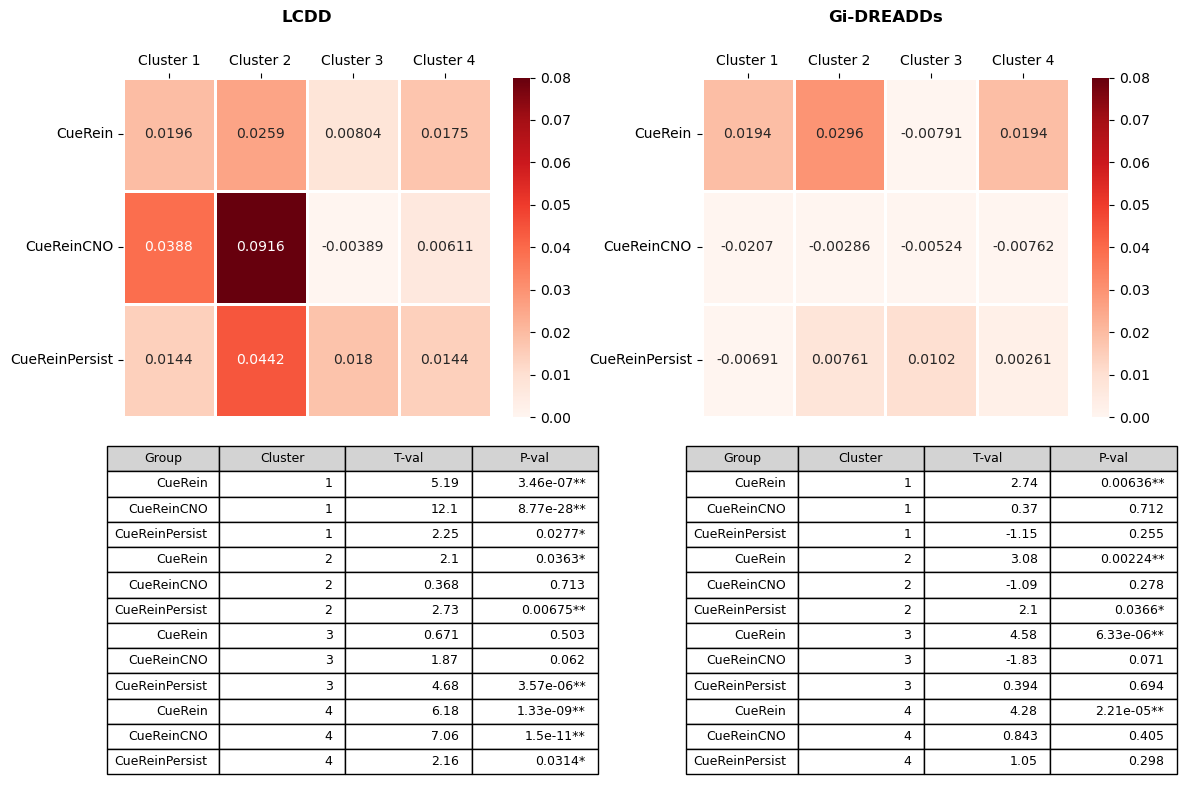

In [240]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
sns.heatmap(df1[['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']], 
            yticklabels=df2['Day'],
            cmap=plt.get_cmap('Reds'),
            vmax=.08,
            vmin=0,
            # vmax=12,
            # vmin=0,
            annot=True,
            linewidths=1,
            fmt='.3',
            ax=ax[0,0])
ax[0,0].xaxis.tick_top()
ax[0,0].set_title('LCDD', fontweight='bold', pad=40)

ax[1,0].axis('off')
cell_text = []
for row in range(len(LCDD_stats_df)):
    cell_text.append(LCDD_stats_df[['Group', 'Cluster', 'T-val', 'P-val']].iloc[row])
table = ax[1,0].table(cellText=cell_text, colLabels=Gi_stats_df.columns, colColours =["lightgrey"]*10, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.auto_set_column_width(False)
table.scale(1.1, 1.25)

sns.heatmap(df2[['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']], 
            yticklabels=df2['Day'],
            cmap=plt.get_cmap('Reds'),
            vmax=.08,
            vmin=0,
            # vmax=12,
            # vmin=0,
            annot=True,
            linewidths=1,
            fmt='.3',
            ax=ax[0,1])
ax[0,1].xaxis.tick_top()
ax[0,1].set_title('Gi-DREADDs', fontweight='bold', pad=40)

ax[1,1].axis('off')
cell_text = []
for row in range(len(Gi_stats_df)):
    cell_text.append(Gi_stats_df[['Group', 'Cluster', 'T-val', 'P-val']].iloc[row])
table = ax[1,1].table(cellText=cell_text, colLabels=Gi_stats_df.columns, colColours =["lightgrey"]*10, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.auto_set_column_width(False)
table.scale(1.1, 1.25)

fig.tight_layout()
path = r'C:\Users\jboqu\Dropbox\2P Imaging Projects\Beth\Josh\Repositories\LC-PrL-DREADDs_Self-Admin_Analysis\cue_analysis\LC-PrL-DREADDs\results\decoding\7-17-23'
plt.savefig(os.path.join(path, 'LC-PrL-DREADDs_SA_cluster-median-values_results.PDF'), format='PDF')
plt.show()

TO-DO:

- Lever decoding graphs LCDD and Gi-DREADDs
- due next Friday, 7/21
- Find days to be in lab more often and day to be in for lab meeting